# Basic descriptors
In the end just some demonstrations on CNR1 data :)

In [66]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Descriptors
from rdkit.Chem.Draw import IPythonConsole
import csv
with open('data/CHEMBL27-chembl_27_activity-Or8O5vK6yNZ1L5id7ev7PGK1lWhfDfRKRJbbuXPM9Os=.csv', 'r') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=";")
    cnr1_ligands = [Chem.MolFromSmiles(m['Smiles']) for m in reader]

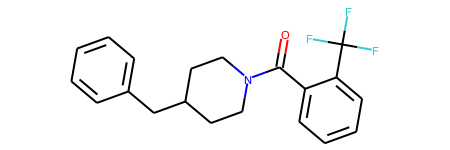

In [67]:
cnr1_ligands[300]

In [68]:
Chem.GetSSSR(cnr1_ligands[300])

3

In [69]:
Chem.CalcNumRotatableBonds(cnr1_ligands[300])

3

In [70]:
cnr1_ligands[300].GetNumHeavyAtoms()

25

In [71]:
from rdkit.Chem import rdMolDescriptors as rdescriptors
rdescriptors.CalcNumLipinskiHBA(cnr1_ligands[300]), rdescriptors.CalcNumLipinskiHBD(cnr1_ligands[300])

(2, 0)

In [72]:
rdescriptors.CalcExactMolWt(cnr1_ligands[300])

347.14969892

In [73]:
rdescriptors.CalcTPSA(cnr1_ligands[300])

20.310000000000002

In [74]:
Descriptors.MolLogP(cnr1_ligands[300])

4.8003000000000045

In [75]:
cnr1_rings = [Chem.GetSSSR(l) for l in cnr1_ligands]
cnr1_rotatable = [Chem.CalcNumRotatableBonds(l) for l in cnr1_ligands]
cnr1_atomcount = [l.GetNumHeavyAtoms() for l in cnr1_ligands]
cnr1_hba = [rdescriptors.CalcNumLipinskiHBA(l) for l in cnr1_ligands]
cnr1_hbd = [rdescriptors.CalcNumLipinskiHBD(l) for l in cnr1_ligands]
cnr1_molwt = [rdescriptors.CalcExactMolWt(l) for l in cnr1_ligands]
cnr1_tpsa = [rdescriptors.CalcTPSA(l) for l in cnr1_ligands]
cnr1_logp = [Descriptors.MolLogP(l) for l in cnr1_ligands]

In [76]:
import pandas as pd
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7, 11.7)})

In [77]:
df = pd.DataFrame(data={'set':'cnr1', 'rings': cnr1_rings,
                        'rotatable': cnr1_rotatable, 'atoms': cnr1_atomcount,
                        'hba': cnr1_hba, 'hbd': cnr1_hbd, 'molwt': cnr1_molwt,
                        'tpsa': cnr1_tpsa, 'logp': cnr1_logp})
df

,set,rings,rotatable,atoms,hba,hbd,molwt,tpsa,logp
0,cnr1,2,5,24,7,3,348.125611,100.19,2.52992
1,cnr1,0,0,4,0,0,95.953355,0.00,1.93520
2,cnr1,4,2,26,4,1,356.246378,43.78,3.14960
3,cnr1,2,5,22,5,4,309.194008,81.95,0.63480
4,cnr1,1,1,14,4,2,186.042927,88.04,1.52836
...,...,...,...,...,...,...,...,...,...
2693,cnr1,4,5,27,4,0,370.214409,48.06,5.22050
2694,cnr1,3,5,25,6,1,362.150954,59.39,2.24684
2695,cnr1,3,6,29,5,1,402.240624,64.99,5.18010
2696,cnr1,2,12,29,4,3,401.236622,73.05,7.00310


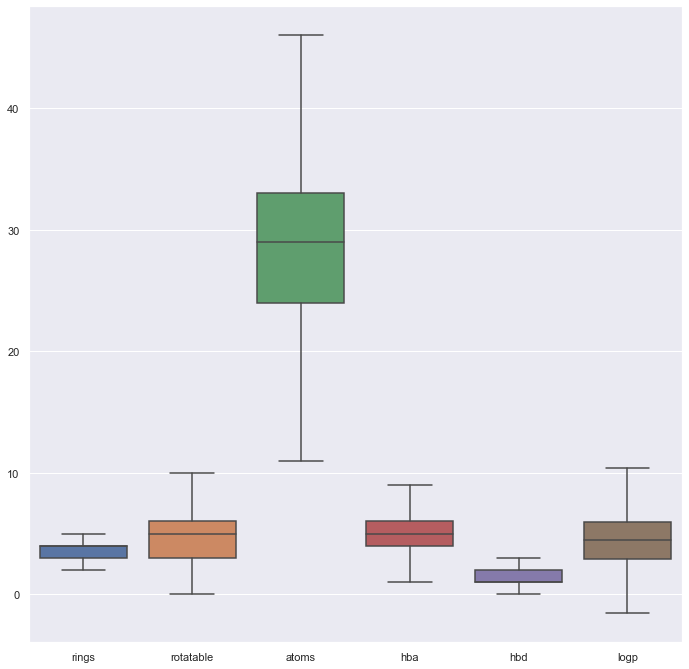

In [78]:
sns.boxplot(data=df[['rings', 'rotatable', 'atoms', 'hba', 'hbd', 'logp']], showfliers=False)

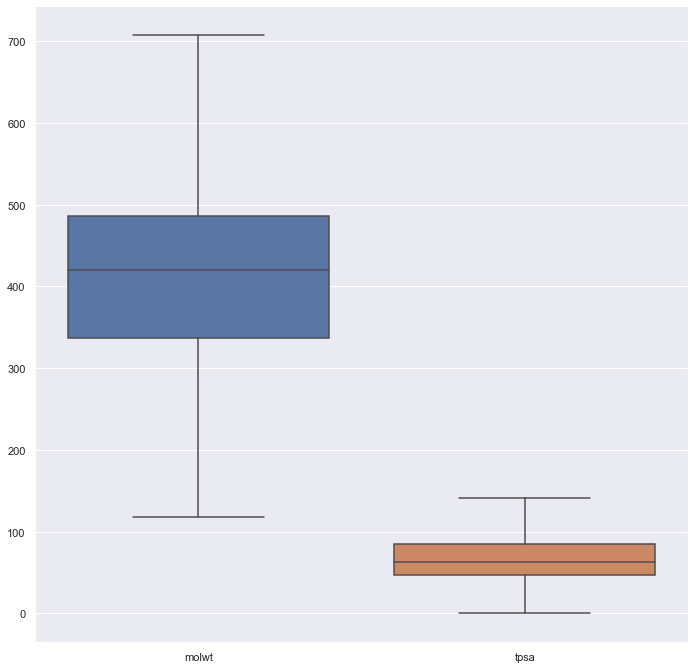

In [79]:
sns.boxplot(data=df[['molwt', 'tpsa']], showfliers = False)


In [80]:
suppl = Chem.SDMolSupplier('../data/drugbank.sdf')
drugs = [m for m in suppl if m]
len(drugs)

RDKit ERROR: [15:58:15] ERROR: Explicit valence for atom # 0 C greater than permitted
RDKit ERROR: [16:08:29] Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [16:08:29] ERROR: Could not sanitize molecule ending on line 20009
RDKit WARNING: [16:08:29] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit WARNING: [16:08:29] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit ERROR: [16:08:29] ERROR: Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [16:08:29] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [16:08:29] ERROR: Could not sanitize molecule ending on line 250947
RDKit ERROR: [16:08:29] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [16:08:29] Explicit valence for atom # 17 O, 3, is greater than permitted
RDKit ERROR: [16:08:29] ERROR: Could not sanitize molecule ending on line 258130
RDKit ERROR: [16:08:29] ERROR: Explicit v

RDKit ERROR: 
RDKit ERROR: [16:08:30] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
RDKit ERROR: 
RDKit ERROR: [16:08:30] ERROR: Could not sanitize molecule ending on line 432118
RDKit ERROR: [16:08:30] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
RDKit ERROR: 
RDKit ERROR: [16:08:30] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 8 9 10
RDKit ERROR: 
RDKit ERROR: [16:08:30] ERROR: Could not sanitize molecule ending on line 442989
RDKit ERROR: [16:08:30] ERROR: Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 8 9 10
RDKit ERROR: 
RDKit ERROR: [16:08:30] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 9
RDKit ERROR: 
RDKit ERROR: [16:08:30] ERROR: Could not sanitize molecule ending on line 447465
RDKit ERROR: [16:08:30] ERROR: Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 9
RDKit ERROR: 
RDKit ERROR: [16:08:30] Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20
RDKit ERROR: 
RDKit ERROR: [16:08:30] ERROR: Could not sanitize molecule ending on line 4

RDKit ERROR: [16:08:31] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [16:08:32] Explicit valence for atom # 0 Be, 3, is greater than permitted
RDKit ERROR: [16:08:32] ERROR: Could not sanitize molecule ending on line 995692
RDKit ERROR: [16:08:32] ERROR: Explicit valence for atom # 0 Be, 3, is greater than permitted
RDKit ERROR: [16:08:33] Explicit valence for atom # 0 C greater than permitted
RDKit ERROR: [16:08:33] ERROR: Could not sanitize molecule ending on line 1151592


7113

In [81]:
drugbank_rings = [Chem.GetSSSR(l) for l in drugs]
drugbank_rotatable = [Chem.CalcNumRotatableBonds(l) for l in drugs]
drugbank_atomcount = [l.GetNumHeavyAtoms() for l in drugs]
drugbank_hba = [rdescriptors.CalcNumLipinskiHBA(l) for l in drugs]
drugbank_hbd = [rdescriptors.CalcNumLipinskiHBD(l) for l in drugs]
drugbank_molwt = [rdescriptors.CalcExactMolWt(l) for l in drugs]
drugbank_tpsa = [rdescriptors.CalcTPSA(l) for l in drugs]
drugbank_logp = [Descriptors.MolLogP(l) for l in drugs]

In [82]:
df_drugbank = pd.DataFrame(data={'set':'drugs', 'rings': drugbank_rings,
                                 'rotatable': drugbank_rotatable, 'atoms': drugbank_atomcount,
                                 'hba': drugbank_hba, 'hbd': drugbank_hbd, 'molwt': drugbank_molwt,
                                 'tpsa': drugbank_tpsa, 'logp': drugbank_logp})
df_drugbank

,set,rings,rotatable,atoms,hba,hbd,molwt,tpsa,logp
0,drugs,6,66,155,57,31,2178.985813,901.57,-8.11643
1,drugs,6,31,91,32,20,1268.641439,495.89,-3.10570
2,drugs,4,19,74,26,18,1068.426955,435.41,-4.13203
3,drugs,6,38,102,31,20,1429.669818,495.67,-0.50613
4,drugs,1,15,85,23,5,1201.841368,278.80,3.26900
...,...,...,...,...,...,...,...,...,...
7108,drugs,1,0,8,1,1,128.002892,20.23,2.04560
7109,drugs,3,3,24,9,5,340.079432,149.82,-1.32270
7110,drugs,6,14,79,27,13,1114.554641,403.10,1.54710
7111,drugs,0,13,21,5,0,330.147689,83.50,-0.00030


In [83]:
joint_df = pd.concat([df, df_drugbank], ignore_index=True)
joint_df

,set,rings,rotatable,atoms,hba,hbd,molwt,tpsa,logp
0,cnr1,2,5,24,7,3,348.125611,100.19,2.52992
1,cnr1,0,0,4,0,0,95.953355,0.00,1.93520
2,cnr1,4,2,26,4,1,356.246378,43.78,3.14960
3,cnr1,2,5,22,5,4,309.194008,81.95,0.63480
4,cnr1,1,1,14,4,2,186.042927,88.04,1.52836
...,...,...,...,...,...,...,...,...,...
9806,drugs,1,0,8,1,1,128.002892,20.23,2.04560
9807,drugs,3,3,24,9,5,340.079432,149.82,-1.32270
9808,drugs,6,14,79,27,13,1114.554641,403.10,1.54710
9809,drugs,0,13,21,5,0,330.147689,83.50,-0.00030


In [84]:
melted_df = pd.melt(joint_df, id_vars=['set'], value_vars=['rings', 'rotatable', 'atoms', 'hba', 'hbd', 'logp'])
melted_df

,set,variable,value
0,cnr1,rings,2.0000
1,cnr1,rings,0.0000
2,cnr1,rings,4.0000
3,cnr1,rings,2.0000
4,cnr1,rings,1.0000
...,...,...,...
58861,drugs,logp,2.0456
58862,drugs,logp,-1.3227
58863,drugs,logp,1.5471
58864,drugs,logp,-0.0003


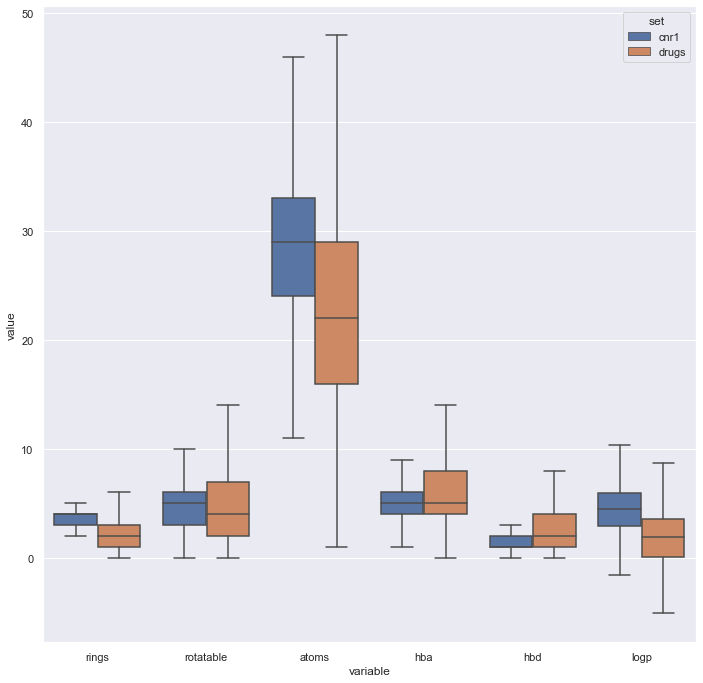

In [85]:
sns.boxplot(y='value', x='variable', hue='set', data=melted_df, showfliers=False)

In [86]:
melted_df2 = pd.melt(joint_df, id_vars=['set'], value_vars=['molwt', 'tpsa'])
melted_df2

,set,variable,value
0,cnr1,molwt,348.125611
1,cnr1,molwt,95.953355
2,cnr1,molwt,356.246378
3,cnr1,molwt,309.194008
4,cnr1,molwt,186.042927
...,...,...,...
19617,drugs,tpsa,20.230000
19618,drugs,tpsa,149.820000
19619,drugs,tpsa,403.100000
19620,drugs,tpsa,83.500000


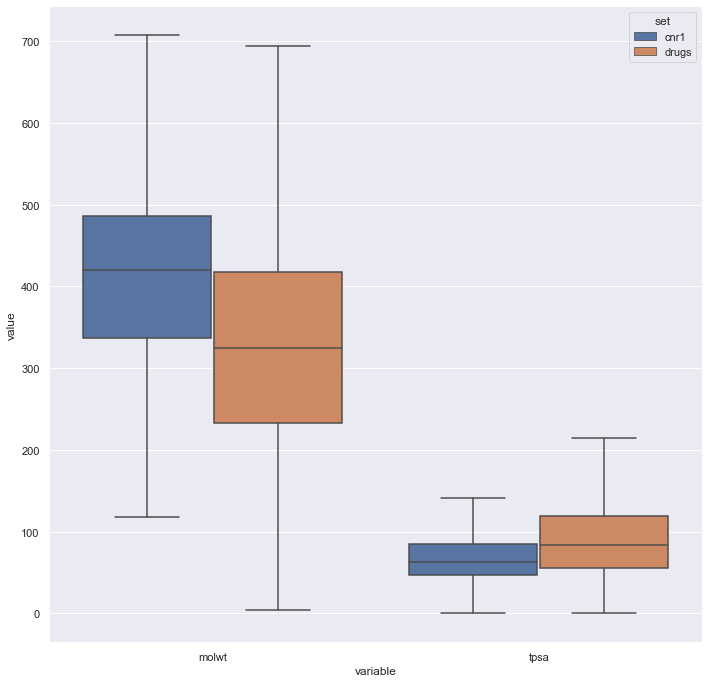

In [87]:
sns.boxplot(y='value', x='variable', hue='set', data=melted_df2, showfliers=False)

CNR1 ligands are heavier molecules with bigger amount of rings, among them are less hydrogen bond donors and they also have less polar atoms, than Drugbank structures. 

In [88]:
cnr1_heteroatoms_ratio = [rdescriptors.CalcNumHeteroatoms(l)/l.GetNumHeavyAtoms() for l in cnr1_ligands if l.GetNumHeavyAtoms()>0]
drugbank_heteroatoms_ratio = [rdescriptors.CalcNumHeteroatoms(l)/l.GetNumHeavyAtoms() for l in drugs if l.GetNumHeavyAtoms()>0]
cnr1_heterocycles_ratio = [rdescriptors.CalcNumHeterocycles(l)/rdescriptors.CalcNumRings(l)
                           for l in cnr1_ligands if rdescriptors.CalcNumRings(l)]
drugbank_heterocycles_ratio = [rdescriptors.CalcNumHeterocycles(l)/rdescriptors.CalcNumRings(l)
                               for l in drugs if rdescriptors.CalcNumRings(l)]

In [89]:
df = pd.DataFrame(data=[{'set': 'cnr1', 'variable': 'heteroatom_ratio', 'value': x}
                        for x in cnr1_heteroatoms_ratio])
df = df.append(pd.DataFrame(data=[{'set': 'drugbank', 'variable': 'heteroatom_ratio', 'value': x}
                                  for x in drugbank_heteroatoms_ratio]), ignore_index=True)
df = df.append(pd.DataFrame(data=[{'set': 'cnr1', 'variable': 'heterocycle_ratio', 'value': x}
                                  for x in cnr1_heterocycles_ratio]), ignore_index=True)
df = df.append(pd.DataFrame(data=[{'set': 'drugbank', 'variable': 'heterocycle_ratio', 'value': x}
                                  for x in drugbank_heterocycles_ratio]), ignore_index=True)
df

,set,variable,value
0,cnr1,heteroatom_ratio,0.333333
1,cnr1,heteroatom_ratio,0.500000
2,cnr1,heteroatom_ratio,0.153846
3,cnr1,heteroatom_ratio,0.227273
4,cnr1,heteroatom_ratio,0.285714
...,...,...,...
18507,drugbank,heterocycle_ratio,0.000000
18508,drugbank,heterocycle_ratio,0.000000
18509,drugbank,heterocycle_ratio,0.666667
18510,drugbank,heterocycle_ratio,0.500000


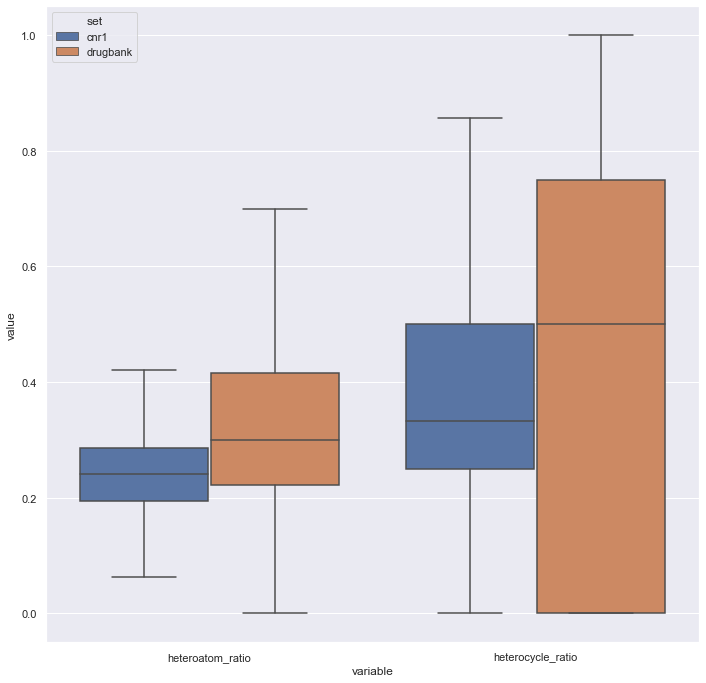

In [90]:
sns.boxplot(y='value', x='variable', hue='set', data=df, showfliers=False)

CNR1 ligands have less heteroatoms and less heterocykles in it, probably because of less hba and hbd numbers.